# 차원축소
* 차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
* 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성 --> 선형 모델에서는 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능 떨어짐
* 다차원의 피처를 차원 축소하여 피처 수를 줄이면 더 직관적으로 데이터 해석 가능

# PCA (Principal Component Analysis)
* 대표적인 차원 축소 기법
* 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
* 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소
* PCA 수행 순서
    1. 입력 데이터 세트의 공분산 행렬을 생성
    2. 공분산 행렬의 고유벡터와 고유값을 계산
    3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

# 붓꽃 데이터 세트 예제

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 품종에 따른 붓꽃 데이터 세트 분포 시각화

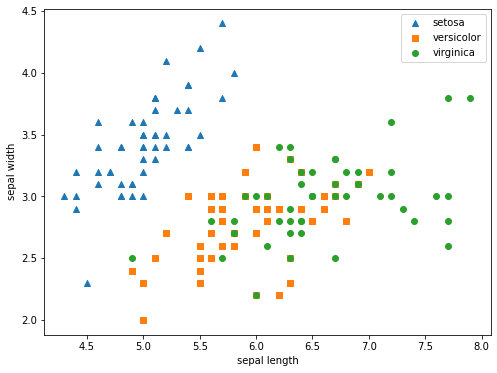

In [3]:
markers = ['^','s','o']
plt.figure(figsize=(8,6))
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# 결과
# setosa를 명확히 구분
# versicolor랑 virginica 섞여있음

## 개별 속성 스케일링
* PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향 받음
* 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

In [6]:
from sklearn.preprocessing import StandardScaler

# target값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

## 스케일링이 적용된 데이터 세트에 PCA적용
* 4차원 (4개 속성)의 붓꽃 데이터를 2차원 (2개의 PCA 속성) PCA 데이터로 변환

* fit(), transform(), fit_transform() 차이점  
https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

In [11]:

from sklearn.decomposition import PCA

# n_components는 PCA로 변환할 차원의 수를 의미 
pca = PCA(n_components=2)

# fit(), transform()을 호출해 PCA 변환 데이터 반환 

#pca.fit(iris_scaled)
#iris_pca = pca.transform(iris_scaled)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)
print(type(iris_pca))

# 결과
# 원본 데이터 세트(150,5)를 (150,2) 데이터 세트로 반환
# 넘파이 행렬
# ndarray를 dataframe으로 변경 필요함 


(150, 2)
<class 'numpy.ndarray'>


In [29]:
# dataframe으로 변경
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


## 2개의 속성으로 PCA 변환된 데이터 세트를 2차원 시각화

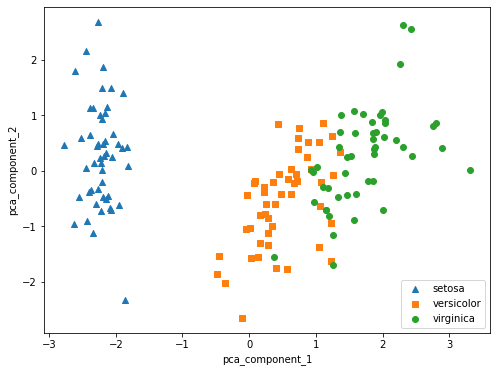

In [16]:
markers = ['^','s','o']
plt.figure(figsize=(8,6))
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 결과
# setosa품종 명확히 구분 가능
# versicolor와 virginica도 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분 

# PCA Component별로 원본 데이터의 변동성을 얼마나 반영하는지 알아보기
# explained_variance_ratio_ 이용

In [17]:
print(pca.explained_variance_ratio_)

# 결과
# 첫번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지
# 두번째 PCA 변환 요소인 pca_component_2가 약 22.8% 차지
# 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명가능

[0.72962445 0.22850762]


# 원본 붓꽃 데이터 세트와 PCA로 변환된 붓꽃 데이터 세트 분류 결과 비교

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)

scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ',scores)
print('원본 데이터 평균 정확도 : ',np.mean(scores))

pca_x = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_x,iris.target, scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도 : ',scores_pca)
print('PCA 변환 데이터 평균 정확도 : ',np.mean(scores_pca))

# 결과
# 원본 데이터 세트 대비 PCA 예측 정확도는 낮아짐 (4개의 속성이 2개 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 10%하락)
# PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다
# 그래도 4개 속성에서 2개 속성으로 속성 개수가 50% 감소한 것이 비해서는 PCA변환 후에도 원본 데이터 특성을 상당 부분 유지 

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96
PCA 변환 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 :  0.88
